{{ badge }}
$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$

# Eigenvectors in python

Unsurprisingly, there is a function to calculate eigenvalues and eigenvectors in python! 
* For most cases, we can use the ```np.linalg.eig``` function
* If we only wanted the eigenvalues, ```np.linalg.eigvals``` will just calculate those. 


## Example 1: real roots

Let's start with a simple example where we already know the roots: a lower triangular matrix
\begin{align}
\arr{A}=\begin{bmatrix}6&10&6 \\ 0&8&12 \\ 0&0&2 \end{bmatrix} 
\end{align}

In [1]:
import numpy as np

A = np.array([[6,10,6],
              [0,8,12],
              [0,0,2]])

# Fill this in!
eigvals, eigvecs = np.linalg.eig(A)

# Notice that we can use variables in a print!
# f'something {var}' means sub in the var in the string
print(f'Eigenvalues = {eigvals}') 
print(f'Eigenvectors: \n{eigvecs}')

Eigenvalues = [6. 8. 2.]
Eigenvectors: 
[[ 1.          0.98058068  0.84270097]
 [ 0.          0.19611614 -0.48154341]
 [ 0.          0.          0.24077171]]


Let's compare these to the known values from lecture 6:

Eigenspace corresponding to $\arr{A}$ :
\begin{array}{}
6, \begin{bmatrix} 1\\0\\0 \end{bmatrix} ; & 8,\begin{bmatrix} 5\\1\\0 \end{bmatrix}; & 2, \begin{bmatrix} 7\\-4\\2\end{bmatrix} ; & \vec{x}=\vec{0}
\end{array}

Notice that the eigenvectors returned by numpy are the same ratios, but different absolute numbers. We can rescale these if we need. 


In [2]:
eigvecs[:,1]/eigvecs[0,1]*5

array([5., 1., 0.])

In [3]:
eigvecs[0,1]/eigvecs[1,1]

4.999999999999999

In [4]:
eigvecs[:,2]/eigvecs[2,2]*2

array([ 7., -4.,  2.])

## Complex roots

$ \arr{A} = \begin{bmatrix} 1&2 \\ -2&1 \end{bmatrix} $

This is easy now that we know how to use ```np.linalg.eig```!

In [5]:
A = np.array([[1,2],
              [-2,1]])

eigvals, eigvecs = np.linalg.eig(A)

print(f'Eigenvalues = {eigvals}')
print(f'Eigenvectors: \n{eigvecs}')

Eigenvalues = [1.+2.j 1.-2.j]
Eigenvectors: 
[[0.        -0.70710678j 0.        +0.70710678j]
 [0.70710678+0.j         0.70710678-0.j        ]]


In [6]:
eigvals[0]+1.j

(1+3.0000000000000004j)

Notice that numpy is using "j" to indicate a complex number. Otherwise things look pretty simple!

### Here are some examples of complex numbers:

In [7]:
a = 1+2.j
print('a=%s'%str(a))
print('a+1=%s'%str(a+1))
print('2a=%s'%str(2*a))

a=(1+2j)
a+1=(2+2j)
2a=(2+4j)


# In-class problem 

Calculate the eigenvalues and eigenvectors for the matrix 

$\arr{A} = \begin{bmatrix} 0&9&-12 \\ -9&0&20 \\ 12&-20&0 \end{bmatrix}$


In [8]:
import numpy as np

A = np.array([[0,9,-12],
              [-9,0,20],
              [12,-20,0]])

eigvals, eigvecs = np.linalg.eig(A)

print(eigvals)

print(eigvecs)

[3.19744231e-16 +0.j 0.00000000e+00+25.j 0.00000000e+00-25.j]
[[ 0.8       +0.j          0.21828206-0.36380344j  0.21828206+0.36380344j]
 [ 0.48      +0.j          0.13096924+0.60633906j  0.13096924-0.60633906j]
 [ 0.36      +0.j         -0.6596969 +0.j         -0.6596969 -0.j        ]]


# Population eigenvalue problem

Let's start with calculating the eigenvalues and eigenvectors of the population transition matrix $\arr{A}$

In [21]:
A = np.array([[0.3,0.2,0],
              [0.6,0.2,0],
              [.1,0.6,1]])

eigvals, eigvecs = np.linalg.eig(A)

print(f'Eigenvalues = {eigvals}')
print(f'Eigenvectors: \n{eigvecs}')

Eigenvalues = [ 1.  -0.1  0.6]
Eigenvectors: 
[[ 0.          0.40824829 -0.32444284]
 [ 0.         -0.81649658 -0.48666426]
 [ 1.          0.40824829  0.81110711]]


Matches up with what we already know! 

Let's do a little example for a random starting population of 1000 people. We can use a tool like np.random.rand to generate random numbers.

In [20]:
# make a vector p for the starting population

# 3 random numbers from 0-1 that up to 1
np.random.seed(42)
p = np.random.rand(3)
p = p/p.sum()

# multiply each fraction by 1000 people
p = p*1000

# Make sure there's an integer number of people
p = p.round()

print('The starting population is %d healthy, %d sick, %d dead'%(p[0],p[1],p[2]))

The starting population is 182 healthy, 462 sick, 356 dead


Now, let's increment the population:

In [22]:
p2 = A@p
print('The population after one year is %d healthy, %d sick, %d dead'%(p2[0],p2[1],p2[2]))

The population after one year is 147 healthy, 201 sick, 651 dead


In [23]:
n_years = 200
p2 = np.linalg.matrix_power(A,n_years)@p
print('The population after %d year is %1.3f healthy, %1.3f sick, %1.3f dead'%(n_years, p2[0],p2[1],p2[2]))

The population after 200 year is 0.000 healthy, 0.000 sick, 1000.000 dead


Let's do this after n iterations:


In [25]:
def population(init_pop, n_years):
  return np.linalg.matrix_power(A,n_years)@init_pop

population(p,3)

array([ 51.03 ,  76.356, 872.614])

Now, let's go ahead and see what happens if we solve it as an eigenvalue problem!

In [27]:
c_vector = np.linalg.solve(eigvecs, p)

print(c_vector)

p_infinite = c_vector[0]*eigvecs[:,0]
print('The final population after infinite years is %d healthy, %d sick, %d dead'%(p_infinite[0],
                                                                                   p_infinite[1],
                                                                                   p_infinite[2]))

[1000.         -132.27244611 -727.40085235]
The final population after infinite years is 0 healthy, 0 sick, 1000 dead


Notice that everyone dies. This happens for any starting configuration. 

## In-class problem: zombies

We discover that there's a 20% chance of a dead person coming back from the dead as a sick person (a zombie?). 

Make a function `zombie_population(init_pop, n_years)` that calculates the population given a starting population

Calculate the steady state distribution of live, sick, and dead people. 

What questions do we have?

In [28]:
A = np.array([[0.3,0.2,0],
              [0.6,0.2,0.2],
              [.1,0.6,0.8]])

eigvals, eigvecs = np.linalg.eig(A)

print(eigvals)

print(eigvecs)

[-0.17015621  0.47015621  1.        ]
[[ 0.34604809 -0.44068607  0.08630637]
 [-0.81348329 -0.37492736  0.3020723 ]
 [ 0.4674352   0.81561343  0.94937007]]


In [30]:
zombie_A = np.array([[0.3,0.2,0],
              [0.6,0.2,0.2],
              [.1,0.6,0.8]])

def zombie_population(init_pop, n_years):
  return np.linalg.matrix_power(zombie_A,n_years)@init_pop

zombie_population([800,200,0],100)

array([ 64.51612903, 225.80645161, 709.67741935])

Text(0, 0.5, 'Number of Dead Population')

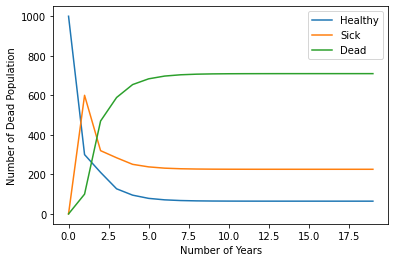

In [32]:

init_pop = [1000,0,0]
num_healthy = [zombie_population(init_pop,n_years)[0] for n_years in range(0,20)]
num_sick = [zombie_population(init_pop,n_years)[1] for n_years in range(0,20)]
num_dead = [zombie_population(init_pop,n_years)[2] for n_years in range(0,20)]

import matplotlib.pyplot as plt
plt.plot(range(0,20),num_healthy,label='Healthy')
plt.plot(range(0,20),num_sick, label='Sick')
plt.plot(range(0,20),num_dead, label='Dead')
plt.legend()
plt.xlabel('Number of Years')
plt.ylabel('Number of Dead Population')

In [18]:
zombie_A = np.array([[0.3,0.2,0],
              [0.6,0.2,0.2],
              [.1,0.6,0.8]])

def zombie_population(init_pop, n_years):
  return np.linalg.matrix_power(zombie_A,n_years)@init_pop

zombie_population(p, 400)

array([ 64.51612903, 225.80645161, 709.67741935])